In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('CardioGoodFitness.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [3]:
# calculates the central tendancy, dispersion for continuous data
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [4]:
# to include non numerical data
df.describe(include = 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
Product          180 non-null object
Age              180 non-null int64
Gender           180 non-null object
Education        180 non-null int64
MaritalStatus    180 non-null object
Usage            180 non-null int64
Fitness          180 non-null int64
Income           180 non-null int64
Miles            180 non-null int64
dtypes: int64(6), object(3)
memory usage: 12.7+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110aacd30>,
      dtype=object)

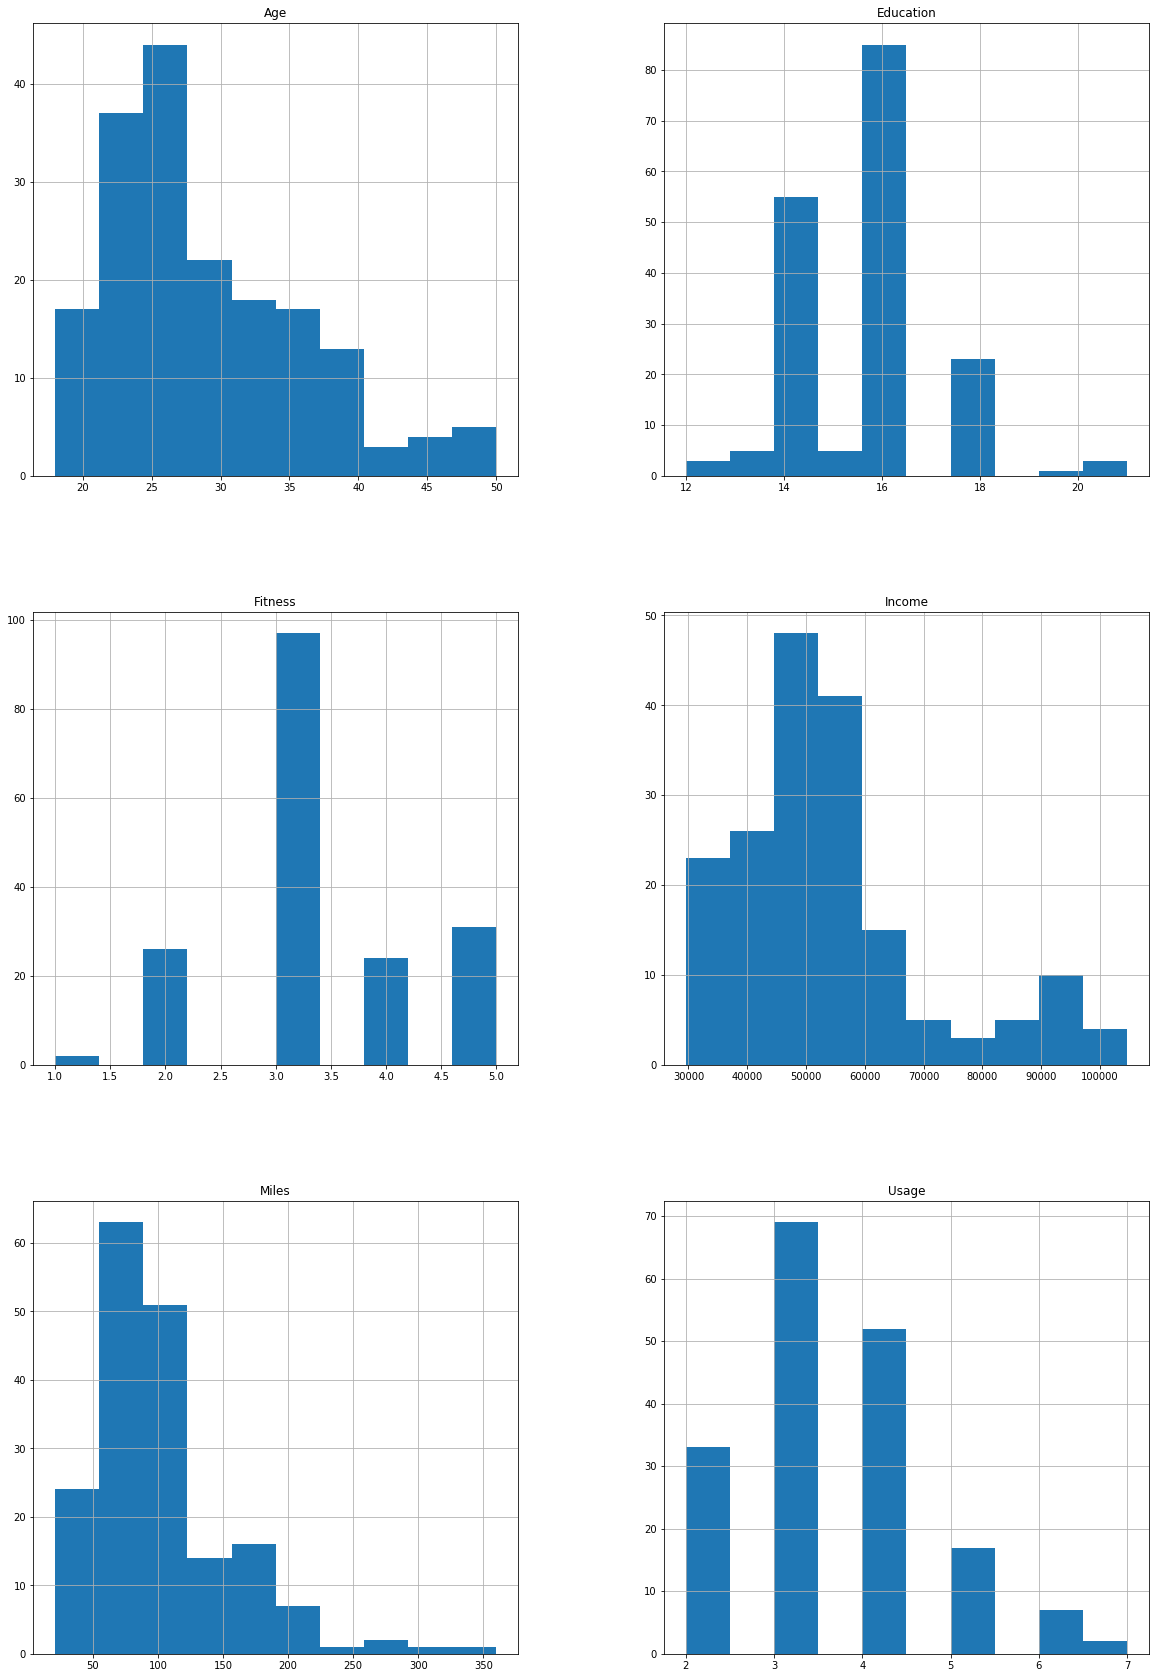

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(figsize=(20,30))

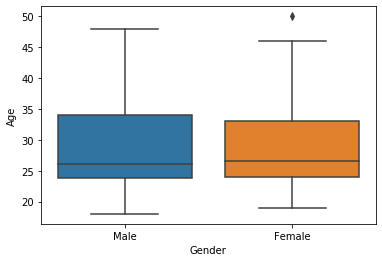

In [8]:
import seaborn as sns
sns.boxplot(df['Gender'], df['Age'])

In [11]:
# crosstab is used to create the frequency or the conditional table
pd.crosstab(df['Product'],df['Gender'])
# Frequency table / Cross tabulation that shows occurances between two combination

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


In [17]:
pd.crosstab(df['Product'],df['MaritalStatus'])

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


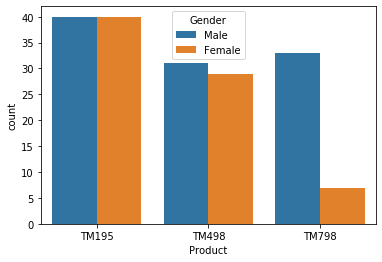

In [20]:
sns.countplot(df['Product'],hue=df['Gender'])

In [44]:
# Pivot 
pd.pivot_table(df,index=['Product','MaritalStatus'],columns=['Gender'], aggfunc=len)

Age      Education      Fitness      Income       \
Gender                Female Male    Female Male  Female Male Female Male   
Product MaritalStatus                                                       
TM195   Partnered         27   21        27   21      27   21     27   21   
        Single            13   19        13   19      13   19     13   19   
TM498   Partnered         15   21        15   21      15   21     15   21   
        Single            14   10        14   10      14   10     14   10   
TM798   Partnered          4   19         4   19       4   19      4   19   
        Single             3   14         3   14       3   14      3   14   

                       Miles       Usage       
Gender                Female Male Female Male  
Product MaritalStatus                          
TM195   Partnered         27   21     27   21  
        Single            13   19     13   19  
TM498   Partnered         15   21     15   21  
        Single            14   10     14   10  
TM798   Partnered          4   19      4   19  
        Single             3   14      3   14

In [49]:
pd.pivot_table(df,values=['Income','Fitness'],index=['Product','Gender'],columns=['MaritalStatus'], aggfunc=len)

Fitness           Income       
MaritalStatus  Partnered Single Partnered Single
Product Gender                                  
TM195   Female        27     13        27     13
        Male          21     19        21     19
TM498   Female        15     14        15     14
        Male          21     10        21     10
TM798   Female         4      3         4      3
        Male          19     14        19     14

In [51]:
pd.pivot_table(df,index=['Product','Gender'],values='Miles', columns=['MaritalStatus'])

MaritalStatus    Partnered      Single
Product Gender                        
TM195   Female   74.925926   78.846154
        Male     80.190476   99.526316
TM498   Female   94.000000   80.214286
        Male     87.238095   91.100000
TM798   Female  215.000000  133.333333
        Male    176.315789  147.571429

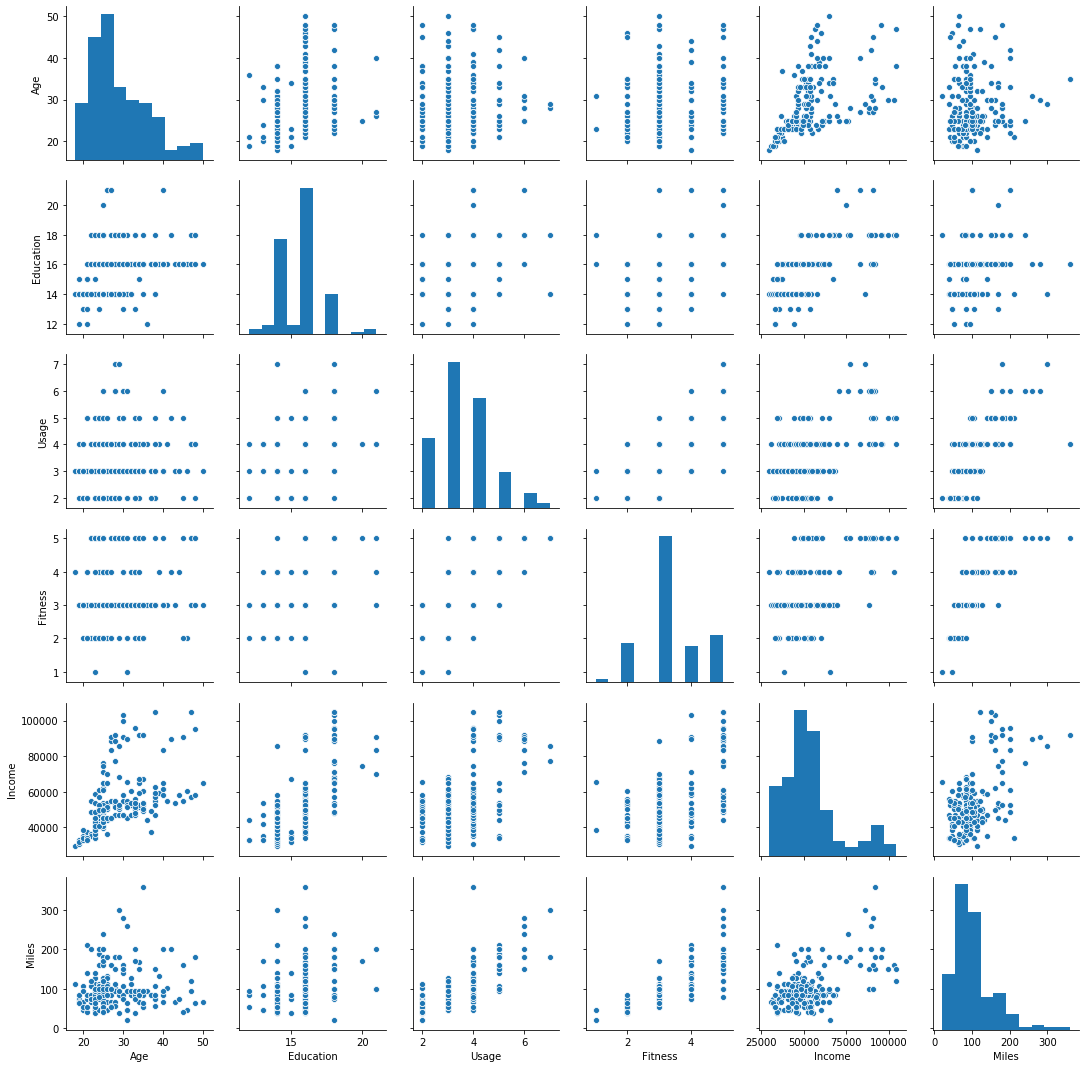

In [52]:
sns.pairplot(df)

In [53]:
df['Age'].std()

6.943498135399795

In [54]:
df['Age'].mean()

28.788888888888888

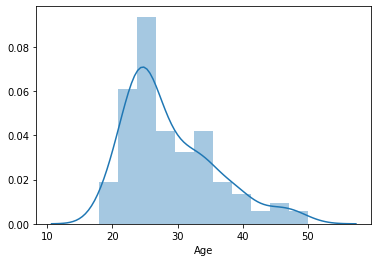

In [55]:
sns.distplot(df['Age'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1259b7780>,
      dtype=object)

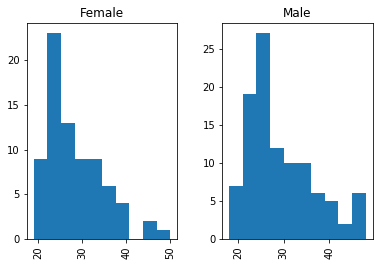

In [57]:
df.hist(by='Gender', column='Age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128556eb8>,
      dtype=object)

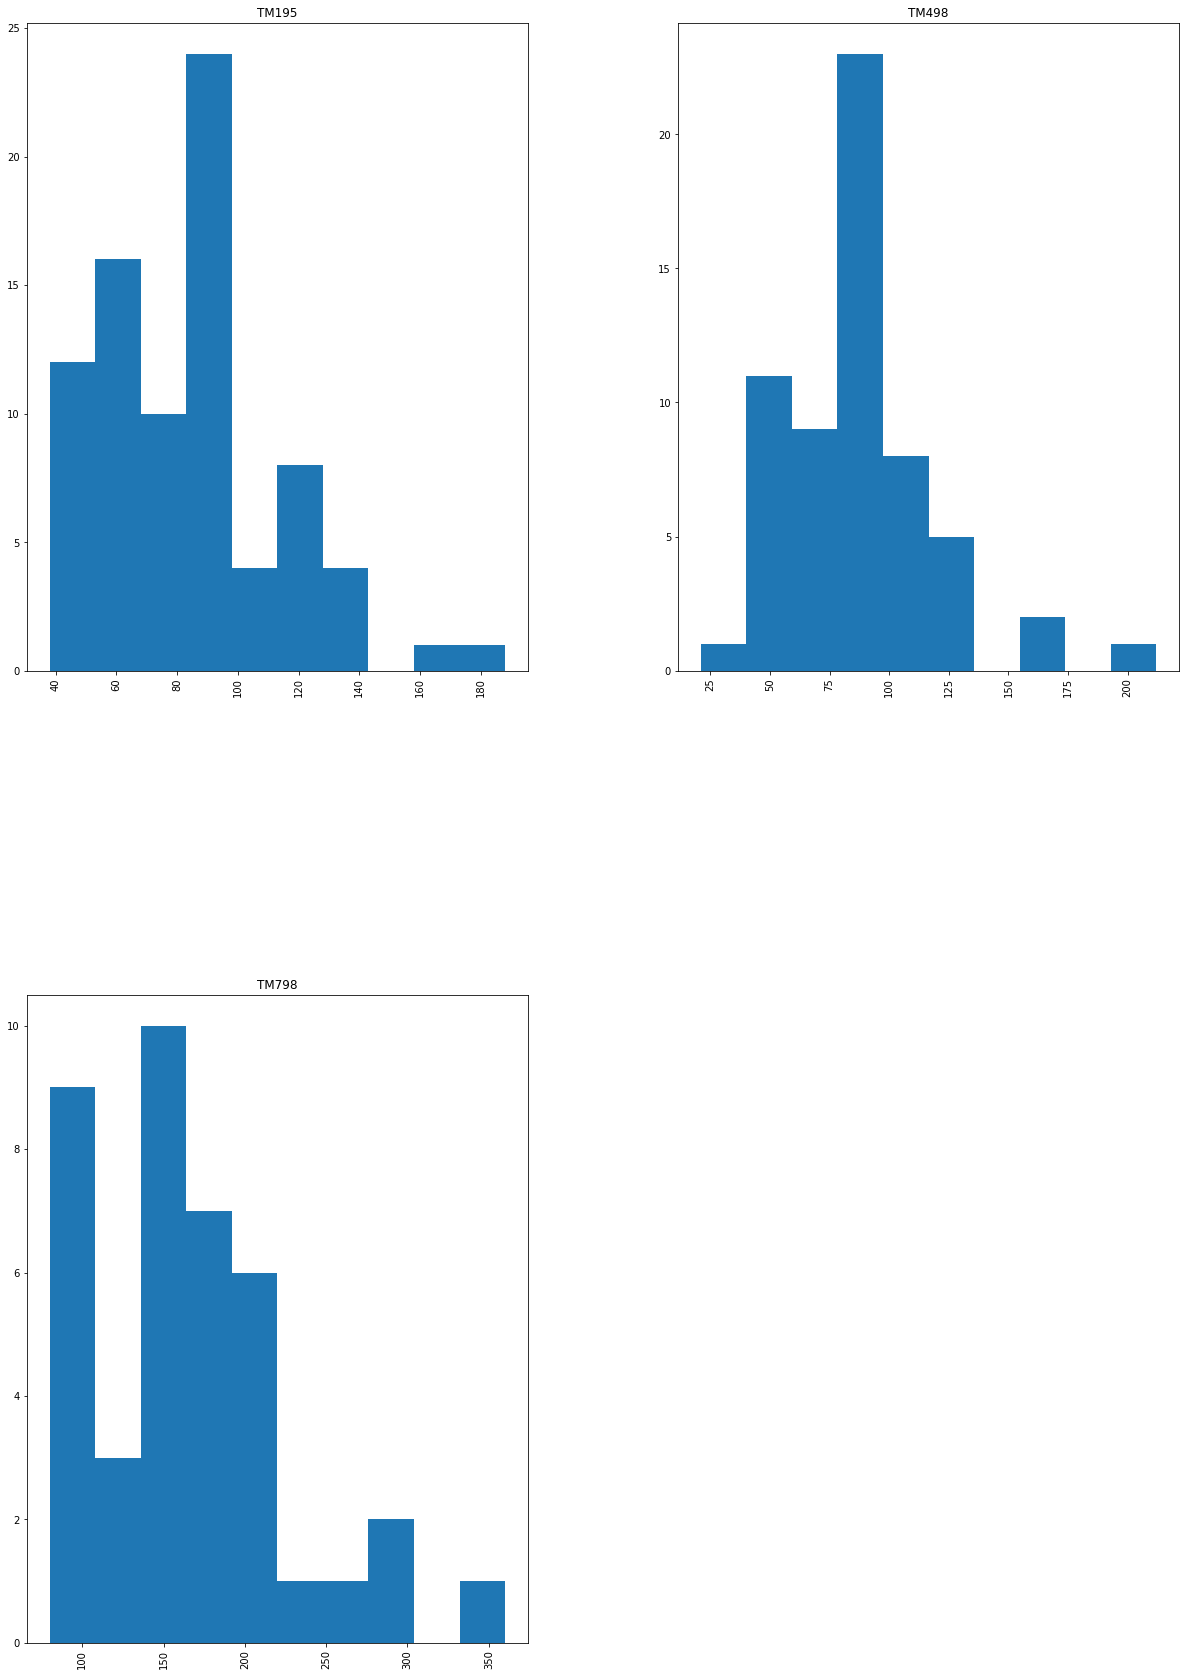

In [59]:
df.hist(by='Product',column='Miles',figsize=(20,30))

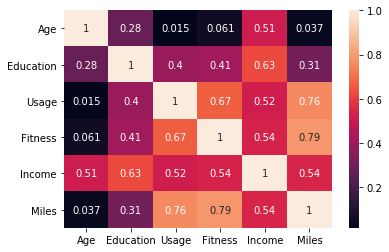

In [64]:
# To check correlation variables - Heatmap
# Scatterplot doesn't give correlation coefficient value and does not talk about magnitude of things

# for heatmap we need correlation matrix
corr = df.corr()
corr

sns.heatmap(data=corr, annot=True)

In [65]:
sns.regplot(x='Miles', y='Fitness')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [66]:
from sklearn import linear_model

In [70]:
reg = linear_model.LinearRegression()
# y = mx + c
y = df['Miles']
x = df[['Usage']]
# x = df[['Usage','Fitness']]

In [73]:
reg.fit(x,y)
reg.coef_, reg.intercept_

(array([36.29364912]), -22.220276400464215)

In [75]:
# miles = -22.22 + 36.294 * Usage

# miles = -56.74 + 20.215 * Usage + 27.206 * Fitness